/Users/xingyu/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


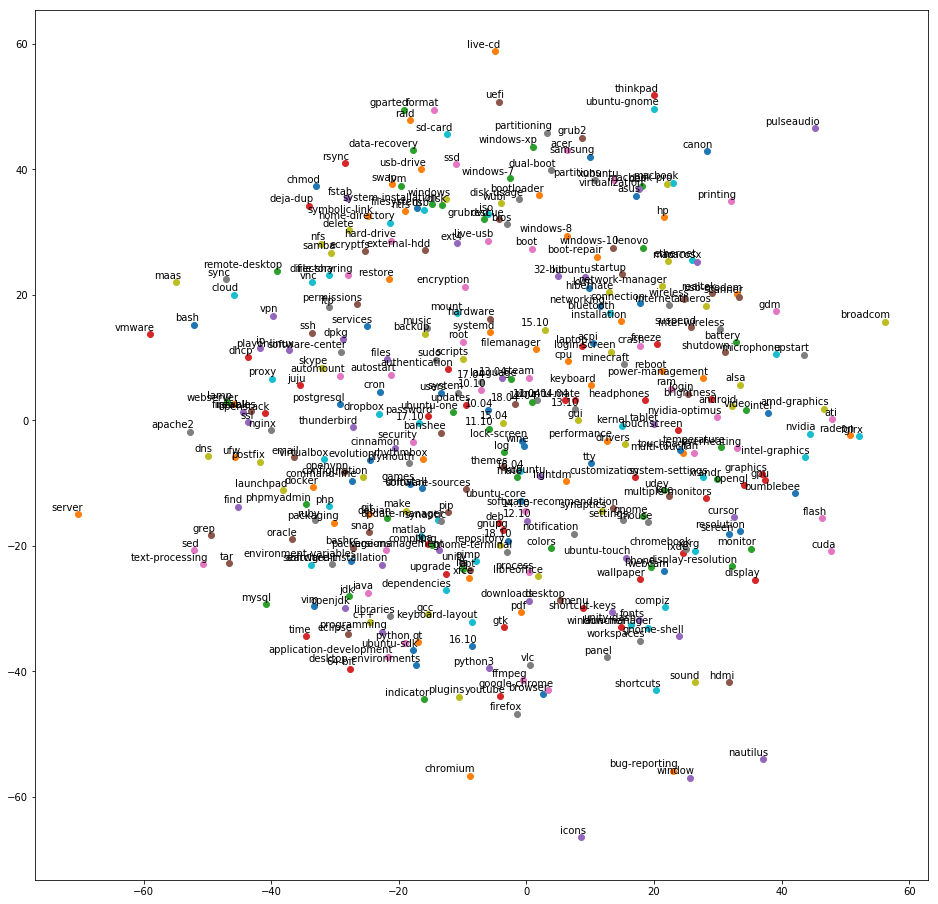

jdk: 
[('sqldeveloper', 0.6962780952453613), ('pdfsam', 0.6720154285430908), ('openjdk', 0.6698431372642517), ('jre', 0.6668111681938171), ('adt', 0.6598876714706421), ('jvm', 0.6581977605819702), ('gradle', 0.6490025520324707), ('groovy', 0.6266578435897827), ('maven-3', 0.6228101253509521), ('grails', 0.6179212331771851)]
docker: 
[('openvz', 0.5989982485771179), ('azure', 0.597846269607544), ('lxc', 0.5789130926132202), ('container', 0.5578562617301941), ('lxd', 0.5207281112670898), ('btsync', 0.5090173482894897), ('nginx', 0.4854232668876648), ('lighttpd', 0.48248031735420227), ('debootstrap', 0.47845515608787537), ('reverse-proxy', 0.4703293442726135)]
macosx: 
[('mac', 0.6396222114562988), ('refit', 0.6193244457244873), ('refind', 0.6137155294418335), ('bootcamp', 0.5236288905143738), ('windows', 0.5225260853767395), ('apple', 0.5179163813591003), ('macbook-pro', 0.5112990140914917), ('macbook', 0.48838430643081665), ('macbook-air', 0.4803764820098877), ('windows-7', 0.4625396430

In [14]:
from gensim.models import word2vec
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
def tsne_plot(model, mincount=0):
    """Creates and TSNE model and plots it"""
    labels = []
    tokens = []

    for word in model.wv.vocab:
        if model.wv.vocab[word].count >= mincount:
            tokens.append(model[word])
            labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

model = word2vec.Word2Vec.load("model/word2vec.model")
tsne_plot(model, mincount = 400)

result1 = model.wv.similar_by_word("jdk")
print "jdk: "
print result1

result2 = model.wv.similar_by_word("docker")
print "docker: "
print result2

result3 = model.wv.similar_by_word("macosx")
print "macosx: "
print result3